In [1]:
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd 

%matplotlib inline

In [2]:
data_dir = '../data/raw'

In [3]:
listing_df = pd.read_csv(data_dir + '/airbnb.csv')

In [4]:
listing_missing = listing_df.isnull().sum().sort_values(ascending = False) / len(listing_df)

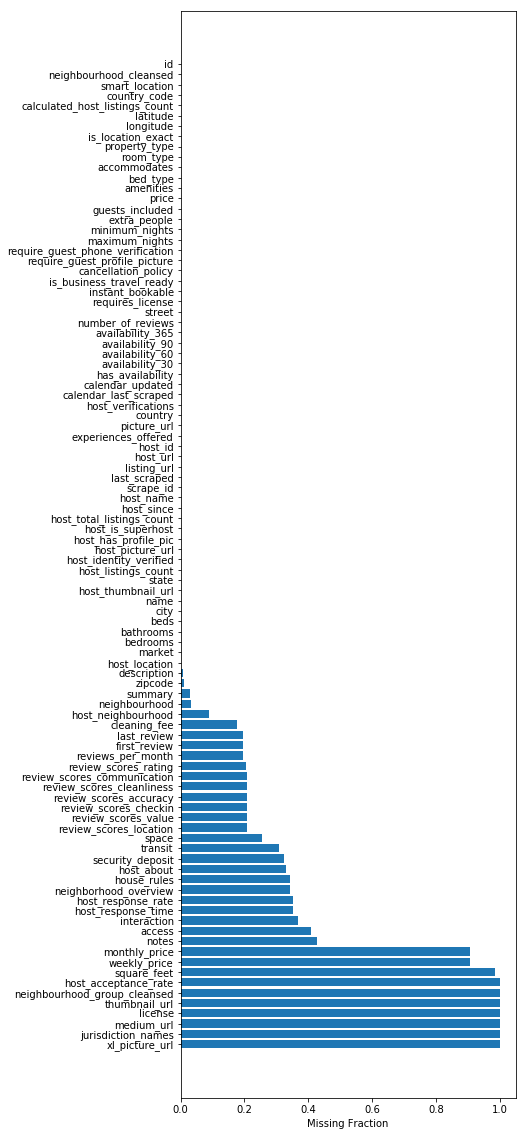

In [5]:
plt.figure(figsize = (6, 20))
plt.barh(listing_missing.index, listing_missing.values)
plt.xlabel('Missing Fraction')
plt.savefig('../image/missing_values.pdf', bbox_inches = 'tight')

In [6]:
keep_cols = [
    'latitude', 'longitude', 
    'beds', 'bedrooms', 'bathrooms', 'accomodates', 
    'price', 'availability_30', 'availability_60',
    'availability_90', 'availability_365', 'property_type',
    'room_type'
]

In [7]:
for col in listing_df.columns:
    if col not in keep_cols:
        listing_df.drop(col, inplace = True, axis = 1)
        
listing_df['price'] = listing_df['price'].replace( '[\$,)]','', regex=True).astype(float)

In [8]:
plt.rc('font', size = 18)
plt.rc('font', family = 'serif')

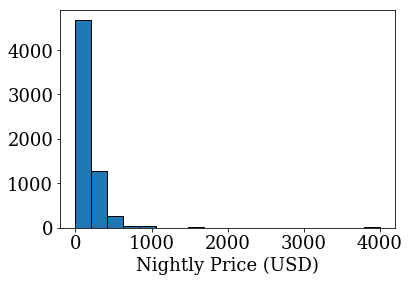

In [9]:
plt.hist(listing_df['price'], bins = np.linspace(0, 4000, 20), edgecolor = 'k');
plt.xlabel('Nightly Price (USD)')
plt.savefig('../image/price_histo.png', bbox_inches = 'tight')

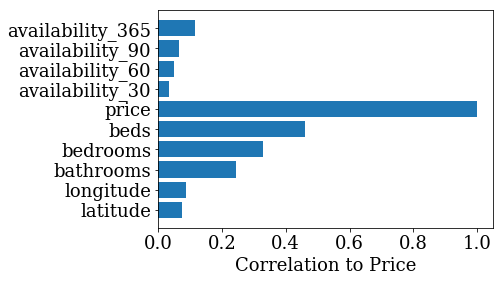

In [10]:
plt.barh(
    listing_df.corr()['price'].index,
    listing_df.corr()['price'].values
)

plt.xlabel('Correlation to Price')
plt.savefig('../image/price_corr.png', bbox_inches = 'tight')

(array([2145.,  223.,  282.,  264.,  309.,  412.,  373.,  484.,  518.,
        1286.]),
 array([ 0.,  3.,  6.,  9., 12., 15., 18., 21., 24., 27., 30.]),
 <a list of 10 Patch objects>)

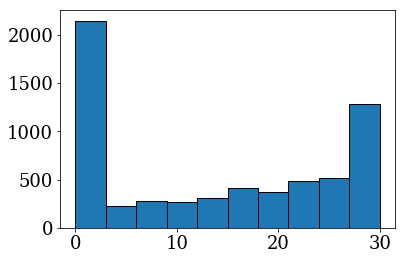

In [11]:
plt.hist(listing_df['availability_30'], edgecolor = 'k')

In [12]:
listing_df.corr()

,latitude,longitude,bathrooms,bedrooms,beds,price,availability_30,availability_60,availability_90,availability_365
latitude,1.000000,0.295843,-0.019605,-0.041708,-0.016448,0.073204,-0.050887,-0.047066,-0.060333,-0.114574
longitude,0.295843,1.000000,0.005452,-0.000732,0.039202,0.086180,0.059415,0.062639,0.070167,0.049102
bathrooms,-0.019605,0.005452,1.000000,0.488762,0.436760,0.242658,0.069022,0.072233,0.070063,0.110614
bedrooms,-0.041708,-0.000732,0.488762,1.000000,0.734100,0.328936,0.041051,0.035381,0.040880,0.049912
beds,-0.016448,0.039202,0.436760,0.734100,1.000000,0.460004,0.109379,0.106610,0.112280,0.137021
price,0.073204,0.086180,0.242658,0.328936,0.460004,1.000000,0.033673,0.049528,0.064375,0.116399
availability_30,-0.050887,0.059415,0.069022,0.041051,0.109379,0.033673,1.000000,0.940248,0.871058,0.576092
availability_60,-0.047066,0.062639,0.072233,0.035381,0.106610,0.049528,0.940248,1.000000,0.971410,0.664877
availability_90,-0.060333,0.070167,0.070063,0.040880,0.112280,0.064375,0.871058,0.971410,1.000000,0.717458
availability_365,-0.114574,0.049102,0.110614,0.049912,0.137021,0.116399,0.576092,0.664877,0.717458,1.000000


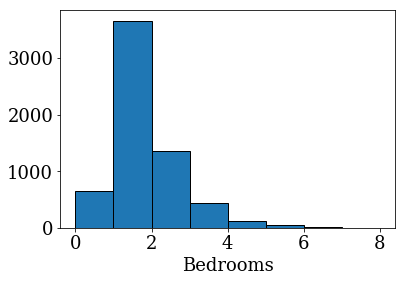

In [13]:
plt.hist(listing_df['bedrooms'], edgecolor = 'k', bins = np.arange(0, 9));
plt.xlabel('Bedrooms')
plt.savefig('../image/bedrooms.png', bbox_inches = 'tight')

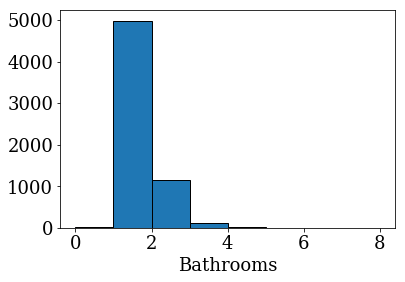

In [14]:
plt.hist(listing_df['bathrooms'], edgecolor = 'k', bins = np.arange(0, 9));
plt.xlabel('Bathrooms')
plt.savefig('../image/bathrooms.png', bbox_inches = 'tight')

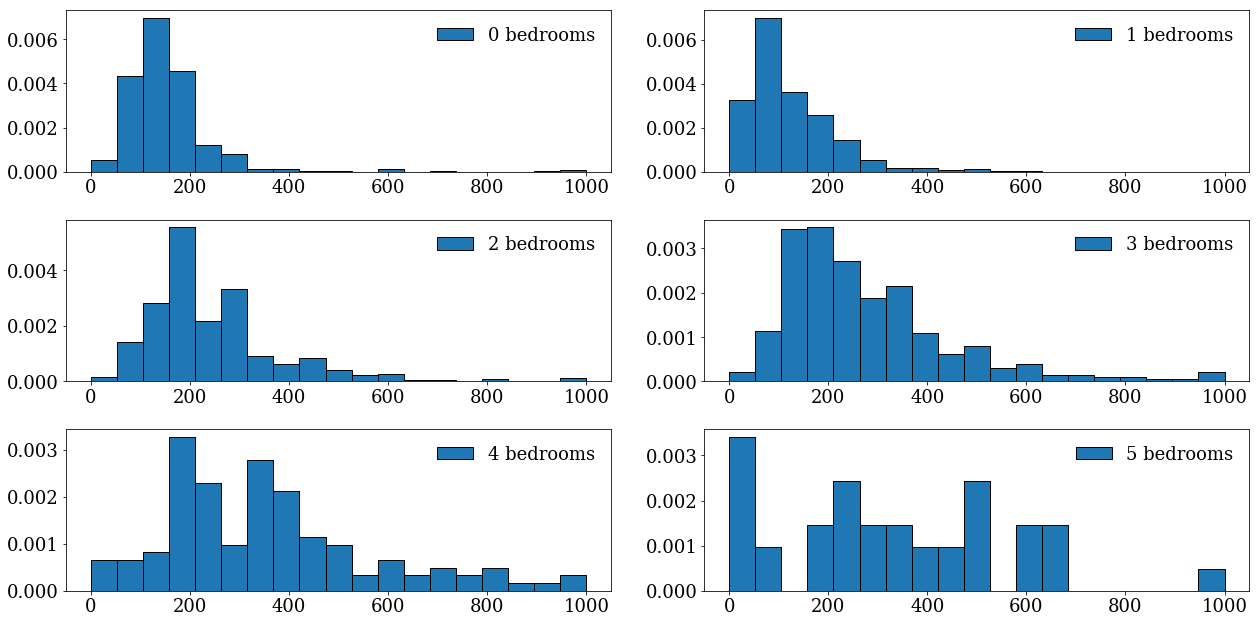

In [15]:
plt.figure(figsize = (18, 9))

for n_bedroom in range(0, 6):
    plt.subplot(3, 2, n_bedroom + 1)
    
    sub = listing_df[listing_df['bedrooms'] == n_bedroom]
    plt.hist(sub['price'], bins = np.linspace(0, 1000, 20), edgecolor = 'k',
            label = '{} bedrooms'.format(n_bedroom), density = True);
    plt.legend(frameon = False)
    
plt.tight_layout()
plt.savefig('../image/price_histos_by_bedroom.png', bbox_inches = 'tight')

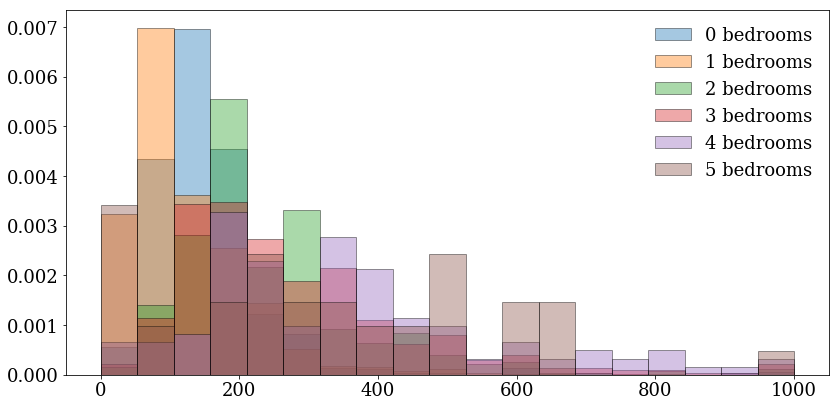

In [16]:
plt.figure(figsize = (12, 6))

for n_bedroom in range(0, 6):
    sub = listing_df[listing_df['bedrooms'] == n_bedroom]
    plt.hist(
        sub['price'], 
        bins = np.linspace(0, 1000, 20), 
        edgecolor = 'k',
        alpha = 0.4, 
        label = '{} bedrooms'.format(n_bedroom), 
        density = True
    );

plt.tight_layout()
plt.legend(frameon = False)

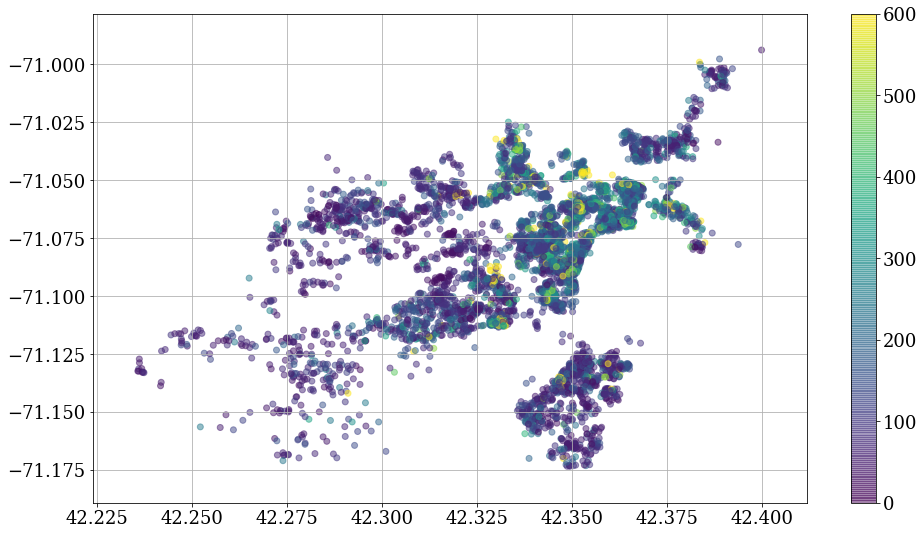

In [17]:
plt.figure(figsize = (16, 9))
plt.scatter(
    listing_df['latitude'],
    listing_df['longitude'],
    c = listing_df['price'],
    alpha = 0.5,
    vmax = 600
)
plt.grid()
plt.colorbar()
plt.savefig('../image/geographic_pricing_map.png', bbox_inches = 'tight')

In [18]:
listing_df['room_type'].value_counts()

Entire home/apt    4013
Private room       2175
Shared room         108
Name: room_type, dtype: int64

In [19]:
listing_df = listing_df[listing_df['room_type'] == 'Entire home/apt']
listing_df = listing_df[listing_df['price'] < 650]

In [20]:
listing_df.isnull().sum()

latitude            0
longitude           0
property_type       0
room_type           0
bathrooms           1
bedrooms            5
beds                1
price               0
availability_30     0
availability_60     0
availability_90     0
availability_365    0
dtype: int64

In [21]:
simple_features = ['latitude', 'longitude', 'bathrooms', 'bedrooms', 'price']

In [22]:
simple_df = listing_df[simple_features]

In [23]:
simple_df.dropna(how = 'any', inplace = True)

/Users/davidriser/anaconda3/envs/insight/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


<BarContainer object of 5 artists>

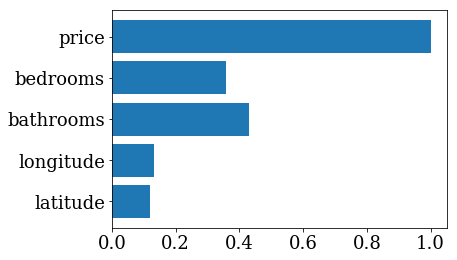

In [24]:
plt.barh(
    simple_df.corr()['price'].index,
    simple_df.corr()['price'].values
)

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
x_train, x_test, y_train, y_test = train_test_split(simple_df[['latitude', 'longitude', 'bathrooms', 'bedrooms']], 
                                                   simple_df['price'])

In [27]:
from sklearn.preprocessing import StandardScaler

In [28]:
ss = StandardScaler()
ss.fit(x_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [29]:
x_train = ss.transform(x_train)
x_test = ss.transform(x_test)

In [30]:
from sklearn.linear_model import LinearRegression

In [31]:
linear_reg = LinearRegression()

In [32]:
linear_reg.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [33]:
y_pred = linear_reg.predict(x_test)

Text(0, 0.5, 'Predicted')

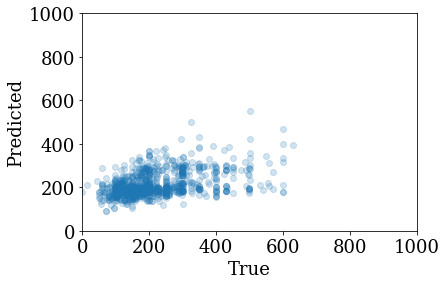

In [34]:
plt.scatter(y_test, y_pred, alpha = 0.2)
plt.xlim([0, 1000])
plt.ylim([0, 1000])
plt.xlabel('True')
plt.ylabel('Predicted')

In [35]:
from sklearn.metrics import mean_squared_error, median_absolute_error, r2_score

In [36]:
print(np.sqrt(mean_squared_error(y_pred, y_test)), median_absolute_error(y_pred, y_test), r2_score(y_pred, y_test))

96.97179838432034 57.499642954163335 -2.024992853524591


In [37]:
from sklearn.ensemble import RandomForestRegressor

In [38]:
rf = RandomForestRegressor()

In [39]:
rf.fit(x_train, y_train)
y_pred = rf.predict(x_test)

/Users/davidriser/anaconda3/envs/insight/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [40]:
print(np.sqrt(mean_squared_error(y_pred, y_test)), median_absolute_error(y_pred, y_test), r2_score(y_pred, y_test))

96.48162918246754 49.69999999999999 -0.39599656852446685


Text(0, 0.5, 'Predicted')

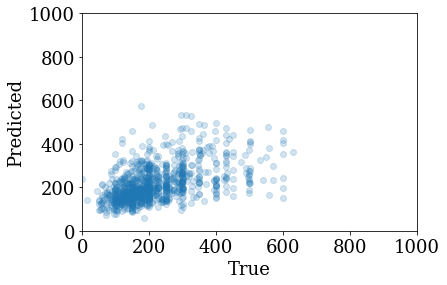

In [41]:
plt.scatter(y_test, y_pred, alpha = 0.2)
plt.xlim([0, 1000])
plt.ylim([0, 1000])
plt.xlabel('True')
plt.ylabel('Predicted')

In [42]:
y_pred

array([380.3, 170.7, 207.9, 179.6, 150. , 163.5, 117.8, 204.6, 313.6,
       229.9, 312.7, 183.5, 278.4, 129.8,  92.7, 236.5, 146.6, 574. ,
       189.1, 245.1, 188.2, 150. , 133. , 191.9, 230.6, 178.9, 195.1,
       190. , 247.1, 262. , 151.4, 113. , 117. , 198.9, 253. , 172.7,
       303.2, 193.8, 220. , 213. , 290.4, 164. , 183.3, 205.9, 484.3,
       153.6, 165.8, 475. , 197.2, 311.9, 174.7, 279. , 233.7, 225.8,
       307.4, 159. , 173.6, 228. , 131.4, 300.9, 123.1, 202.7, 120.9,
       205. , 174. , 217.6, 202.2, 123.1, 139.8, 278.7, 251.2, 267. ,
       360.6, 232.4, 240.3, 203.3, 216.6, 197.8, 190.9, 327.3, 277.8,
       238.2, 122. , 277.6, 133.5, 199.7, 146.4, 144.5, 203.2, 164.4,
       164.9, 347.6, 458.1, 212. , 219.9, 170.2, 206.7, 155.6, 134.8,
        97.7, 194.6, 190.4, 186.4, 199. , 204.4, 372.4, 290.1, 124.6,
       221.3, 132.8, 150. , 238.4, 252.6, 175.1, 196.9, 244.6, 219.7,
       140.8, 494.7, 142.5, 490. , 165.8, 123.2, 156.6, 249.1, 167.3,
       178.5, 155.9,

In [43]:
y_test.values

array([558., 159., 429., 115., 175., 215., 200., 327., 400., 200., 250.,
       125., 300.,  63., 120., 499., 150., 175., 180., 600.,  99., 150.,
       133., 140., 126., 260., 220., 259., 190.,  87., 400., 159., 150.,
       160., 260.,  95., 300., 199., 250., 194., 210.,  80., 134., 165.,
       363., 175.,  79., 299., 132., 300., 125., 277., 400., 229., 199.,
       110., 289., 499., 208., 200., 115., 192., 115., 213., 220., 145.,
       180., 190., 150., 223., 319., 169., 429., 190., 249., 100., 149.,
       175., 150., 193., 289., 350., 250.,  99., 133., 216., 239.,  99.,
       249.,  95., 250., 485., 397., 150.,  99., 149., 180., 100., 110.,
       105., 300., 150., 194., 600., 180., 287., 194., 120., 132.,  85.,
       150., 121., 250.,  99., 189., 165., 279., 150., 400., 105., 350.,
        90., 140., 133., 162., 169., 150., 146., 188., 249., 142., 199.,
        52., 100., 160., 299., 200., 136., 157., 300., 133.,  75., 180.,
       181., 140., 237., 136., 200., 100., 149., 25

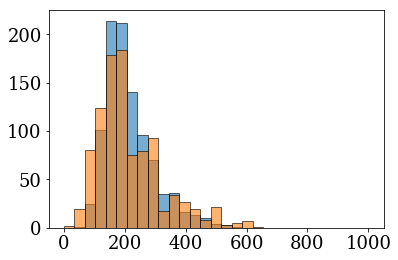

In [44]:
plt.hist(y_pred, bins = np.linspace(0, 1000, 30), edgecolor = 'k', alpha = 0.6);
plt.hist(y_test, bins = np.linspace(0, 1000, 30), edgecolor = 'k', alpha = 0.6);

In [45]:
rf.feature_importances_

array([0.37102195, 0.34911284, 0.21800607, 0.06185915])

In [46]:
listing_df['price_category'] = listing_df['price'].apply(
    lambda x: np.digitize(
        x,                
        np.linspace(0, 650, 6),
    )
)

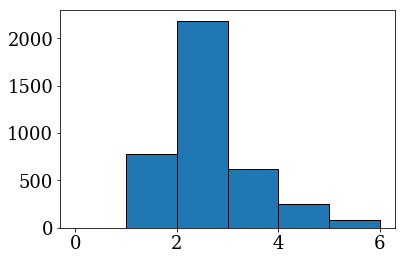

In [47]:
plt.hist(
    listing_df['price_category'],
    bins = np.arange(7),
    edgecolor = 'k'
);

In [48]:
from sklearn.ensemble import RandomForestClassifier

In [49]:
rf_classifier = RandomForestClassifier(n_jobs = -1, n_estimators = 100)

In [50]:
listing_df.dropna(how = 'any', inplace = True)
print('Have {} training samples'.format(len(listing_df)))

Have 3908 training samples


In [51]:
x_train, x_test, y_train, y_test = train_test_split(
    listing_df[['latitude', 'longitude', 'bathrooms', 'bedrooms']], 
                                                   listing_df['price_category'])

In [52]:
rf_classifier.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [53]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_recall_curve

In [54]:
y_pred = rf_classifier.predict(x_test)

In [55]:
confusion_matrix(y_pred, y_test)

array([[ 80,  70,   8,   3,   0],
       [114, 422,  80,  24,   6],
       [  4,  38,  46,  25,   6],
       [  0,  13,  12,  14,   3],
       [  0,   3,   2,   1,   3]])

In [56]:
accuracy_score(y_pred, y_test)

0.5783009211873081

In [57]:
from sklearn.cluster import KMeans

In [58]:
kmeans = KMeans(n_clusters = 4)
listing_df['cluster_index'] = kmeans.fit_predict(listing_df[['latitude', 'longitude']].values)

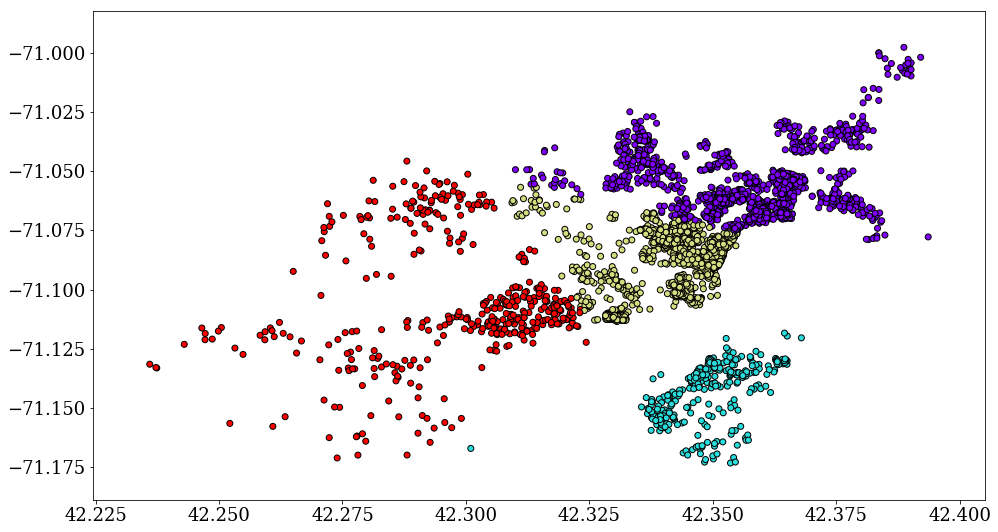

In [59]:
plt.figure(figsize = (16, 9))
plt.scatter(
    listing_df['latitude'],
    listing_df['longitude'],
    c = listing_df['cluster_index'],
    edgecolor = 'k',
    cmap = 'rainbow'
)
plt.savefig('../image/neighborhood_clusters.png', bbox_inches = 'tight')

In [60]:
listing_df.corr()['price']

latitude            0.119039
longitude           0.130918
bathrooms           0.431118
bedrooms            0.357842
beds                0.280930
price               1.000000
availability_30     0.097254
availability_60     0.102946
availability_90     0.100073
availability_365    0.109606
price_category      0.943339
cluster_index      -0.113911
Name: price, dtype: float64

In [61]:
corrs = []

for i in range(2, 30):
    kmeans = KMeans(n_clusters = i)
    listing_df['cluster_index'] = kmeans.fit_predict(listing_df[['latitude', 'longitude']].values)
    corrs.append(np.abs(listing_df.corr()['price']['cluster_index']))

Text(0, 0.5, 'Correlation to Price')

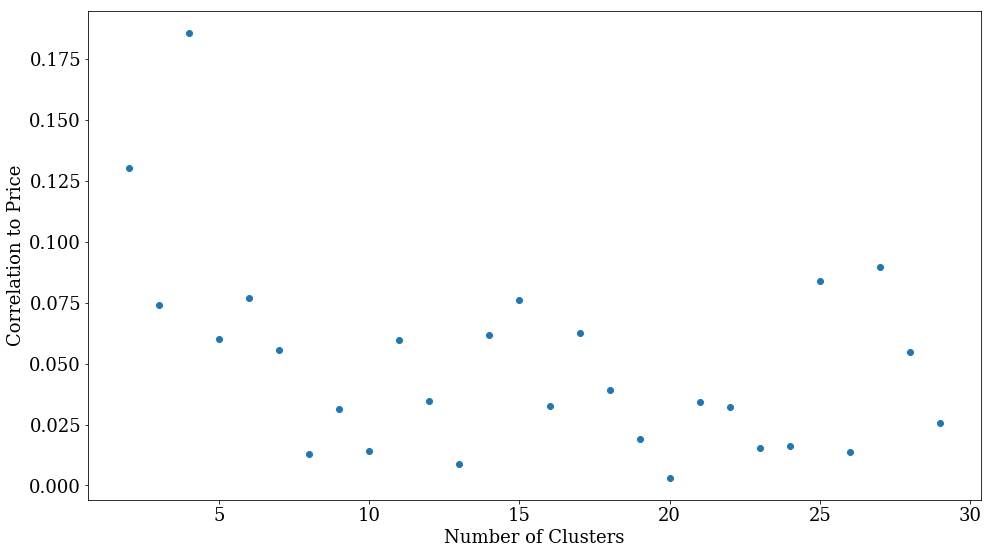

In [62]:
plt.figure(figsize = (16, 9))
plt.plot(range(2, 30), corrs, linestyle = '', marker = 'o')
plt.xlabel('Number of Clusters')
plt.ylabel('Correlation to Price')
plt.savefig('../imasge/')

In [63]:
x = listing_df[['latitude', 'longitude', 'bathrooms', 'bedrooms']].values
y = np.log(listing_df['price'].values)

/Users/davidriser/anaconda3/envs/insight/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  


In [64]:
listing_df.describe()

,latitude,longitude,bathrooms,bedrooms,beds,price,availability_30,availability_60,availability_90,availability_365,price_category,cluster_index
count,3908.000000,3908.000000,3908.000000,3908.000000,3908.000000,3908.000000,3908.000000,3908.000000,3908.000000,3908.000000,3908.000000,3908.000000
mean,42.344319,-71.080378,1.264713,1.494115,2.112334,213.081627,13.710850,30.647134,48.674770,156.873849,2.150205,12.665302
std,0.021297,0.029581,0.492562,1.000750,1.309500,107.800270,11.230344,22.526658,34.745481,130.360749,0.879600,8.276638
min,42.235969,-71.173207,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,42.336812,-71.100314,1.000000,1.000000,1.000000,140.000000,0.000000,3.000000,6.000000,24.000000,2.000000,5.000000
50%,42.346999,-71.074217,1.000000,1.000000,2.000000,189.000000,15.000000,35.000000,59.000000,147.000000,2.000000,13.000000
75%,42.357553,-71.061279,1.500000,2.000000,3.000000,257.500000,25.000000,52.000000,82.000000,279.000000,2.000000,18.000000
max,42.393645,-70.997802,6.000000,6.000000,16.000000,637.000000,30.000000,60.000000,90.000000,365.000000,5.000000,28.000000
